In [1]:
import pandas as pd
import numpy as np 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Import the data 
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
features =pd.read_csv('features.csv')

We already kno what these look like so lets get on with the merging

In [3]:
train_bt = pd.merge(train,stores) 
train = pd.merge(train_bt,features)
#
test_bt = pd.merge(test,stores)
test= pd.merge(test_bt,features)

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [5]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
None


In [7]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Type          115064 non-null  object 
 5   Size          115064 non-null  int64  
 6   Temperature   115064 non-null  float64
 7   Fuel_Price    115064 non-null  float64
 8   MarkDown1     114915 non-null  float64
 9   MarkDown2     86437 non-null   float64
 10  MarkDown3     105235 non-null  float64
 11  MarkDown4     102176 non-null  float64
 12  MarkDown5     115064 non-null  float64
 13  CPI           76902 non-null   float64
 14  Unemployment  76902 non-null   float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB
None


### Missing Values

Now that we have our test and train data sets, lets clean them up so we can use them in our models.

In [8]:
print(train.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64


In [9]:
print(test.isnull().sum())

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


So in our train data set we have to take care of the markdowns. In out training data we have to fill in the markdowns AND some CPI & Unemployment

We will be using median imputation for CPI and Unemployment, using the median for the department. For the Missing Markdown values, we will just assume a markdown of zero. 

In [10]:
test['CPI'] = test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.median()))
test['Unemployment'] = test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.median()))

In [11]:
train = train.fillna(0)
test = test.fillna(0)

In [12]:
print(train.isnull().sum())
print('\n')
print(test.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


Very nice, we have handled all of our missing data. 

### Outliers?

<AxesSubplot:ylabel='Frequency'>

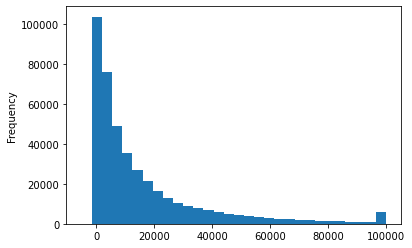

In [14]:
train.Weekly_Sales=np.where(train.Weekly_Sales>100000, 100000, train.Weekly_Sales)
train.Weekly_Sales.plot.hist(bins=30)

There is a very small amount of these outliers. We will ignore them for now and see how/if they affect our model

### Sepparating the date field

Lets sepparate the data field into day of the week, day, month and year. First we begin by turning the data type into datetime:

In [15]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

Now we cna go ahead and sepparate and break down the field

In [17]:
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day

In [18]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5


### Changing our Non-Numericals

In [19]:
train_test_data = [train, test]

We first deal with chanign our store types:

In [20]:
type_mapping = {'A': 1, 'B': 2, 'C': 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

Now we change our holiday variable:

In [21]:
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

In [22]:
train.IsHoliday.value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           421570 non-null  int64         
 1   Dept            421570 non-null  int64         
 2   Date            421570 non-null  datetime64[ns]
 3   Weekly_Sales    421570 non-null  float64       
 4   IsHoliday       421570 non-null  int64         
 5   Type            421570 non-null  int64         
 6   Size            421570 non-null  int64         
 7   Temperature     421570 non-null  float64       
 8   Fuel_Price      421570 non-null  float64       
 9   MarkDown1       421570 non-null  float64       
 10  MarkDown2       421570 non-null  float64       
 11  MarkDown3       421570 non-null  float64       
 12  MarkDown4       421570 non-null  float64       
 13  MarkDown5       421570 non-null  float64       
 14  CPI             421570 non-null  flo

### Feature Selection

We will be removing Mardown5 because it is highly skewed. We will also be removing CPI and Unemployment

In [24]:
features_drop = ['MarkDown5', 'Unemployment', 'CPI']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [26]:
train.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.5,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5


In [27]:
test.head(1)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2


#### We are done with the data preprocessing. Let's save our transforemed datasets and move on to the model fitting process

In [28]:
train.to_csv('train_final.csv')
test.to_csv('test_final.csv')